# CNN part of the project. Includes all experiments related to CNN.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   

In [ ]:
# Hyper-parameters 
num_epochs = 25
batch_size = 32
learning_rate = 0.01

In [ ]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


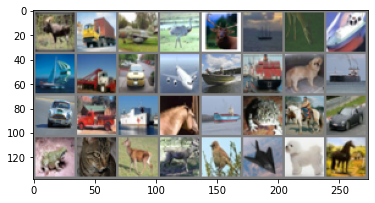

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
print(images.shape)
conv1 = nn.Conv2d(3, 16 , 5)
conv2 = nn.Conv2d(16, 32, 5)
pool = nn.MaxPool2d(2, 2)
#pool_2 = nn.MaxPool2d(2, 2)

x = conv1(images)
x = pool(x)
x= conv2(x)
x = pool(x)
print(x.shape)


torch.Size([32, 3, 32, 32])
torch.Size([32, 32, 5, 5])


# Question 5

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
      

        self.conv1 = nn.Conv2d(3, 16 , 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*5*5, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)


        """
        self.conv1 = nn.Conv2d(3, 16 , 5)
        self.conv2 = nn.Conv2d(16, 16, 5)
        self.pool = nn.MaxPool2d(6, 6)
        self.fc1 = nn.Linear(16*4*4, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        """
        
        
    def forward(self, x):


        """
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)


        """
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        
        return x

In [ ]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

Finished Training


In [ ]:
"""
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')
"""

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        images, labels = images.cuda(), labels.cuda()
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 68 %


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        # calculate outputs by running images through the network
        images, labels = images.cuda(), labels.cuda()
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 88 %


In [ ]:
print(num_epochs)

25


Text(0, 0.5, 'Accuracy %')

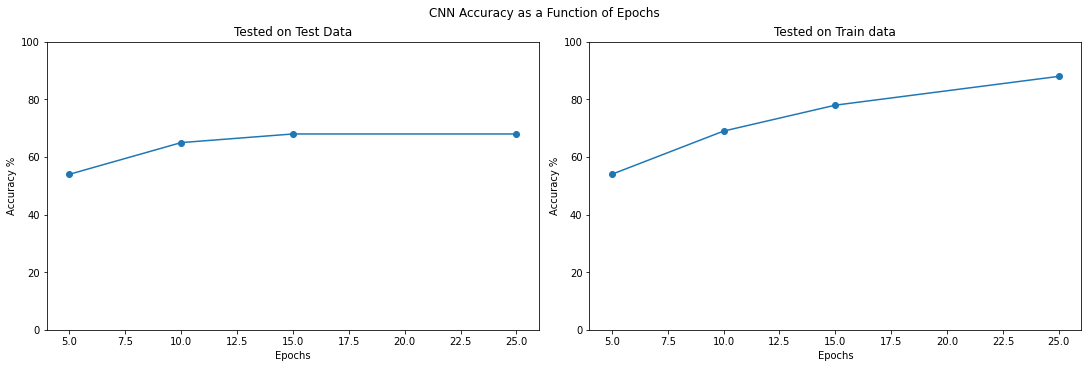

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(15,5))
fig.suptitle('CNN Accuracy as a Function of Epochs')
axes[0].set_ylim(0, 100)
axes[0].scatter([5,10,15,25],[54,65,68,68])
axes[0].plot([5,10,15,25],[54,65,68,68])
axes[0].set_title('Tested on Test Data')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy %')

axes[1].scatter([5,10,15,25],[54,69,78,88])
axes[1].plot([5,10,15,25],[54,69,78,88])
axes[1].set_ylim(0, 100)
axes[1].set_title('Tested on Train data')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy %')

In [ ]:
#target = torch.tensor([0, 1, 2, 3])
#preds = torch.tensor([0, 2, 1, 3])
#accuracy = Accuracy(task="multiclass", num_classes=4)
#accuracy(preds, target)

# Question 6

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='max',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))
print(resnet_model.summary)
     

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f211c6b8760>>


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
#print(Y_train)
Y_train_labels = Y_train
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)
history = resnet_model.fit(X_train, Y_train, epochs=epochs)


Epoch 1/10
1563/1563 [==============================] - 23s 11ms/step - loss: 1.7300 - accuracy: 0.3555
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6620 - accuracy: 0.3859
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5908 - accuracy: 0.4025
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5607 - accuracy: 0.4200
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5350 - accuracy: 0.4257
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5491 - accuracy: 0.4263
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5092 - accuracy: 0.4434
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6002 - accuracy: 0.4121
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5678 - accuracy: 0.4107
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [ ]:
predictions_train = resnet_model.predict(X_train)
predictions_test = resnet_model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [ ]:
#out_classes = classes[np.argmax(predictions)]

correct=0
total=0

for i in range(50000):

  label = np.argmax(predictions_train[i])
  y_true = Y_train_labels[i][0]
  if label == y_true:
    correct+=1

acc = (correct/50000) * 100
print(acc)

46.176


In [ ]:
Y_test_true = []
for i in range(10000):
  for j in range(10):
    if 1 == Y_test[i][j]:
      Y_test_true+=[j]

correct=0
total=0

for i in range(10000):

  label = np.argmax(predictions_test[i])
  y_true = Y_test_true[i]
  if label == y_true:
    correct+=1

acc = (correct/10000) * 100
print(acc)

45.37


Text(0, 0.5, 'Accuracy %')

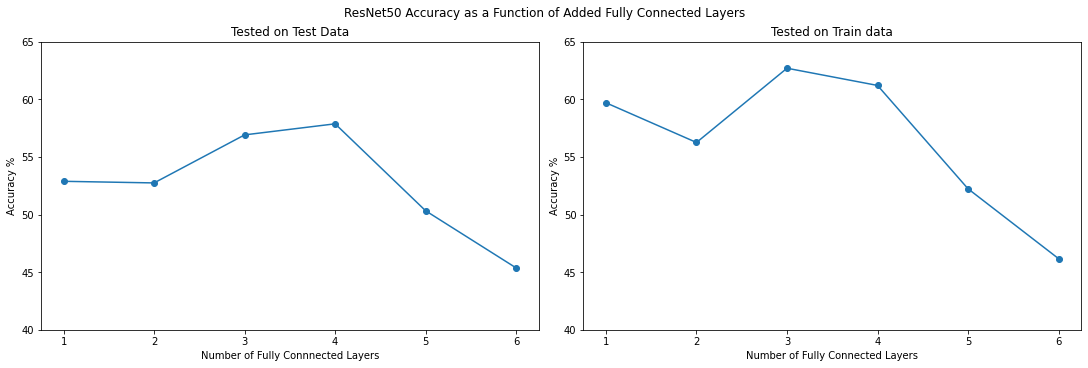

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(15,5))
fig.suptitle('ResNet50 Accuracy as a Function of Added Fully Connected Layers')
axes[0].set_ylim(40, 65)
axes[0].scatter([1,2,3,4,5,6],[52.89,52.75,56.92,57.88,50.33,45.37])
axes[0].plot([1,2,3,4,5,6],[52.89,52.75,56.92,57.88,50.33,45.37])
axes[0].set_title('Tested on Test Data')
axes[0].set_xlabel('Number of Fully Connnected Layers')
axes[0].set_ylabel('Accuracy %')

axes[1].scatter([1,2,3,4,5,6],[59.706,56.26,62.706,61.212,52.24,46.176])
axes[1].plot([1,2,3,4,5,6],[59.706,56.26,62.706,61.212,52.24,46.176])
axes[1].set_ylim(40, 65)
axes[1].set_title('Tested on Train data')
axes[1].set_xlabel('Number of Fully Connected Layers')
axes[1].set_ylabel('Accuracy %')